# Brief Project

Brief project Statistics for Business / Applied Statistics: https://drive.google.com/file/d/1y-03jjrmBQfdzpOh4KnxFjonT0QX1xCo/view

# Problems, Context, Goal and Objective

<!-- # Notes
All of this things is on cusmoter side -->

## Problems and context
In these days, people usually prefer the online cabs because of the convenience and the fares that's already stated before you order. But, when you're not with your phone, taxis could help you if you need one. The problem is, the fare of using taxis could be caused by many things and we want to know what variable correlate with the fare of Taxi in New York City and predict it. After knowing it, we can make a recommendation to people that interest in using Taxis in what condition is the best to use Taxi in New York City.

> ### About Yellow Cabs
Getting into a taxi in an unfamiliar city can be nerve-wracking. You have no idea how much the trip should cost or if the driver is taking the most direct route. In New York City, taxi riders cannot get an advance estimate for taxi fares. The NYC Taxi and Limousine Commission’s official stance is that “it is impossible to pre-calculate a fare because the meter rate depends on traffic, construction, weather, and route to the destination.”
Yellow cabs accept street hails anywhere in New York City. Green Boro Taxis, which operate in the outer boroughs and parts of Manhattan north of certain streets, can either be prearranged or hailed on the street.
- Source: https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc/data

> ### Difference between Taxis and Uber Pricing
- Surge Pricing
  - Taxis do not have surge pricing, but riders might have to wait longer when demand exceeds supply. Taxis do, however, add a \$0.50 surcharge in the evening (8:00 p.m. to 6:00 a.m.) and a \$1 surcharge during rush hour (4:00 p.m. to 8:00 p.m.), Monday through Friday.
  - If Uber’s surge pricing is in effect, you will probably pay a lot less by taking a cab, if you can get one. Surge pricing will at least double your usual fare, and Uber has reported charging customers as much as \$39 per mile.
- Trip to Airport
  - A New York City councilman introduced a bill in January 2015 proposing to limit surge pricing to twice the usual rate. Yellow cabs have regulated fares to and from the Newark International and John F. Kennedy International airports. For trips between Newark International Airport and New York City, the price is the regular metered fare, plus a \$17.50 surcharge, plus tolls. For trips between John F. Kennedy International Airport and Manhattan, it is a flat fare of $52 plus tolls. The regular metered fare applies to all trips to and from LaGuardia International Airport.
- Source: https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc/data

## Goals & Objective
Goal and Objective For this project are, we will:
- Understand Data, Data Cleaning and Data Manipulation.
- Exploratory Data Analysis (EDA).
  - EDA Variable.
  - EDA Variable Numerical with Numerical and Categorical with Numerical.
  - EDA Multi Variable.
- Using a statistical test to identify significance differences in one variable value from two groups. We want to test:
  - Test if people that using NYC Taxi has different mean/average fare between Ratecode 1 and Ratecode 5
  - Test if people that using NYC with Ratecode 1 has different mean/average fare between trip in Rush Hour and Trip in not Rush Hour
  - Test if the Average of Fare from Ratecode 1 has difference in Over Night and in Rush Hour
  - Test if the Average of Fare from Ratecode 2 (Trip to JFK) has difference in Over Night and in Rush Hour
- Create Linear Regression to know how much variables correlate to the fare in taxi. Then, predict the fare of taxis.
  - Outcome of Linear regression model is total_amount (Fare of NYC Taxi). Predictors for linear regression model are trip_distance, extra, tolls_amount, RatecodeID
  - Evaluate the models with R square, cross validation, and look at the visualization of residual plot and predicted values.
- Create Conclusions.
  - Using EDA, create a recommendation which condition suits to use NYC Taxi.
  - Using linear regression model, create a simulation between variable which condition is the best to use NYC Taxi.

<!-- For this project, we want to make a statistical test and linear regression to know what variable correlate with high and down of the fares, then we can predict accurate fare. -->


<!-- - Exploratory Data Analysis
- Probability Analysis on Discreate Variable
- Probability Analysis on Continuous Variable
- Hypothesis Testing and Confidence Interval
- Build linear regression  to predict the fare price of Taxi and interpret the result to know what variable correalate to the fares. Also
- Build simulation which Ratecode should we use for Taxi -->






# How the price works?
It can be difficult to understand how these pricing structures work in real life, so here is an example of how it works with Uber. For a 5-mile, 10-minute trip going 25 miles per hour the entire way, uberX would cost \$2.55 base fare plus \$3.50 for the 10 minutes plus \$10.75 for the mileage, for a total of $16.80. You can now add a tip on Uber if you choose.

But what about yellow cabs? The same 5-mile, 10-minute trip going 25 miles per hour, the entire way in a taxi would cost the base fare of \$2.50 plus 25 units at \$0.50 each, or \$12.50, for a total of \$15.00. It is customary to tip the driver 10% to 20%. This adds \$3 to the cab fare, for a total of $18.

In this example, the cost of each ride is close. Which option is cheaper in other scenarios depends on traffic. When Sara Silverstein did the math for Business Insider, she found that taxis are cheaper in New York City when traffic is flowing at under 20 MPH. Uber is cheaper in other cases unless it is charging high-demand fares.

Reference: https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc/data

Thanks to https://www.gingersoftware.com/grammarcheck for correcting grammar mistakes

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats

In [2]:
# modelling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# cross validation using statsmodel prepartion
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score, cross_validate, KFold

# Read Ready-Use Data

In [3]:
df_use = pd.read_csv('data_ready_use_taxi4.csv', parse_dates=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])
df_use.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,1
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,1
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,1
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,1
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,1


In [4]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79353 entries, 0 to 79352
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   79353 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  79353 non-null  datetime64[ns]
 2   RatecodeID             79353 non-null  float64       
 3   passenger_count        79353 non-null  float64       
 4   trip_distance          79353 non-null  float64       
 5   fare_amount            79353 non-null  float64       
 6   extra                  79353 non-null  float64       
 7   mta_tax                79353 non-null  float64       
 8   tip_amount             79353 non-null  float64       
 9   tolls_amount           79353 non-null  float64       
 10  improvement_surcharge  79353 non-null  float64       
 11  total_amount           79353 non-null  float64       
 12  payment_type           79353 non-null  float64       
 13  t

#### Description in each Variable

- VendorID - A code indicating the TPEP provider that provided the record.
  - 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
- lpep_pickup_datetime - The date and time when the meter was engaged.
- lpep_dropoff_datetime - The date and time when the meter was disengaged.
- Store_and_fwd_flag This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
  - Y= store and forward trip
  - N= not a store and forward trip
- RateCodeID - The final rate code in effect at the end of the trip.
  - 1 = Standard rate
  - 2 & 3 = trips to JFK and Newark Airports (There is extra charge). Also the median trip distance for fares with these rate codes is about 10 times further than the grand median trip distance.
  - 4 = trips to Nassau County or Westchester County. Have a median trip distance slightly lower than for rate codes 2 and 3, this is because trips to these counties are charged “at the standard city rate within New York City and at twice the metered rate while in Westchester or Nassau County. Your taxicab is equipped with a T-PEP (taxi technology) system, and so the metered fare will be calculated automatically by switching to”Rate Code 4" when crossing outside the city limits.
  - 5 = is for negotiated fares and the median trip distance for fares with this rate code is much less at 13.4km, this suggests that cab driver’s are much better off when fares are negotiated.
- PULocationID - TLC Taxi Zone in which the taximeter was engaged
- DOLocationID - TLC Taxi Zone in which the taximeter was disengaged
- Passenger_count The number of passengers in the vehicle.
  - This is a driver-entered value.
- Trip_distance - The elapsed trip distance in miles reported by the taximeter.
- Fare_amount - The time-and-distance fare calculated by the meter.
- Extra - Miscellaneous extras and surcharges. Currently, this only includes the \$0.50 and $1 rush hour and overnight charges.
- MTA_tax - \$0.50 MTA tax that is automatically triggered based on the metered rate in use.
- Tip_amount - This field is automatically populated for credit card tips. Cash tips are not included.
- Tolls_amount - Total amount of all tolls paid in trip.
- Improvement_surcharge - \$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
- Total_amount - The total amount charged to passengers. Does not include cash tips.
- Payment_type A numeric code signifying how the passenger paid for the trip.
  - 1= Credit card
  - 2= Cash
  - 3= No charge
  - 4= Dispute
  - 5= Unknown
  <!-- - 6= Voided trip -->
- trip_type - trip type 1 as inner-city and type 2 as an outer city
- Congestion_Surcharge - Total amount collected in trip for NYS congestion surcharge.


Reference:
- https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc?select=taxi_tripdata.csv
- https://rstudio-pubs-static.s3.amazonaws.com/414401_4e3c51fe17bc4a8f839824b88dee2e6b.html



#### Surcharge
- Improvement Surcharge

This 30-cent charge on all yellow and green taxis is for the Taxi Improvement Fund, which helps pat for accessibility upgrades, including fulfilling the mandate to have enough accessible cabs on New York City streets.

- Congestion Surcharge

This surcharge, which took effect in 2019, adds \$2.50 per ride in yellow taxis, \$2.75 per ride in green taxis and for-hire cars, and 75 cents per passenger for shared rides for all trips that start, end, or pass through Manhattan south of 96th Street.

- Extra
  - Rush Hour Surcharge
Metered-fare rides in yellow taxis and green taxis between 4 p.m. and 8 p.m. on weekdays (excluding holidays) cost an extra $1, which goes to the driver.

  - Overnight Surcharge
This is a 50-cent fee between 8 p.m. and 6 a.m. every day for rides in yellow taxis and metered-fare rides in green taxis. The money goes to the driver.

- MTA Tax
  - MTA State Surcharge
Established in 2009, this 50-cent charge goes towards the MTA.

Reference:
https://www.fox5ny.com/news/nyc-taxi-uber-lyft-fhv-surcharges-fees


# Linear Regression

## Single Predictor

In [6]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

### total_amount & RatecodeID

In [7]:
# Create OLS model object
model1 = smf.ols("total_amount ~ C(RatecodeID)", df_use)

# Fit the model
result1 = model1.fit()

# print the result
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     5016.
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:08:02   Log-Likelihood:            -3.2814e+05
No. Observations:               79353   AIC:                         6.563e+05
Df Residuals:                   79348   BIC:                         6.563e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               18.0830 

In [8]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_ratecode = print_coef_std_err(result1)
results_fare_ratecode

,coef,std err
Intercept,18.083037,0.070278
C(RatecodeID)[T.2.0],48.848767,1.313305
C(RatecodeID)[T.3.0],45.747551,3.668800
C(RatecodeID)[T.4.0],45.148279,2.454455
C(RatecodeID)[T.5.0],14.893958,0.109094


$$y = 18.083 + (48.848 \times \text {RatecodeID_2}) + (45.747 \times \text {RatecodeID_3}) + (45.148 \times \text {RatecodeID_4}) + (14.893 \times \text {RatecodeID_5})$$

- `Intercept`
  - The expected average fare of a customer that has Ratecode = 1 (Standard Rate) [as a baseline], Ratecode.2 = 0, Ratecode.3 = 0, Ratecode.4 = 0, and Ratecode.5 = 0 is \$18.083

- Coefficient in `RatecodeID = 2 (Trip to JFK Airport)`
  - Comparing a Customer with RatecodeID = 2 and a Customer with RatecodeID = 1, with the other Ratecode = 0, the predicted fare on a trip of RatecodeID = 2 is \$48.848 higher on average

- Coefficient in `RatecodeID = 3 (Trip to Newark Airport)`
  - Comparing a Customer with RatecodeID = 3 and a Customer with RatecodeID = 1, with the other Ratecode = 0, the predicted fare on a trip of RatecodeID = 3 is \$45.747 higher on average

- Coefficient in `RatecodeID = 4 (Trip to Nassau / Westchester)`
  - Comparing a Customer with RatecodeID = 4 and a Customer with RatecodeID = 1, with the other Ratecode = 0, the predicted fare on a trip of RatecodeID = 4 is \$45.148 higher on average

- Coefficient in `RatecodeID = 5 (Negotiated Fares)`
  - Comparing a Customer with RatecodeID = 5 and a Customer with RatecodeID = 1, with the other Ratecode = 0, the predicted fare on a trip of RatecodeID = 5 is \$14.89 higher on average

- Visualize the data and regression line

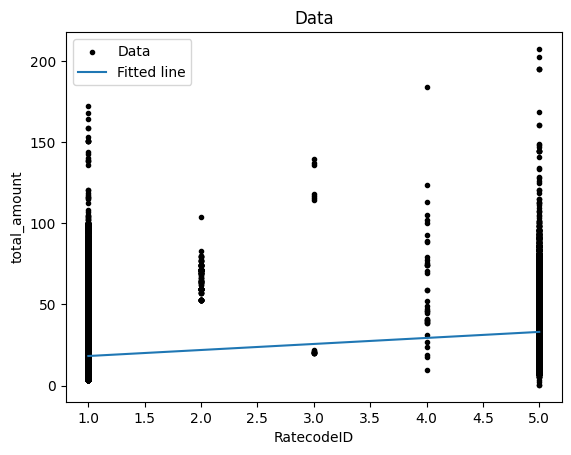

In [9]:
# Create OLS model object
model1_ = smf.ols("total_amount ~ RatecodeID", df_use)

# Fit the model
result1_ = model1_.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_ratecode_ = print_coef_std_err(result1_)
# results_fare_ratecode_

predictor = "RatecodeID"
outcome = "total_amount"
data = df_use.copy()
results_ = results_fare_ratecode_.copy()

# scatter-plot data
x = data[predictor]
y = data[outcome]

# Plot the data
plt.scatter(x, y, marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

### total_amount & trip_type

In [10]:
df_use['trip_type'].value_counts()

1.0    78272
2.0     1081
Name: trip_type, dtype: int64

In [11]:
# Create OLS model object
model2_1 = smf.ols("total_amount ~ C(trip_type)", df_use)

# Fit the model
result2_1 = model2_1.fit()

# print the result
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.870
Date:                Sat, 06 Jan 2024   Prob (F-statistic):              0.172
Time:                        01:21:29   Log-Likelihood:            -3.3708e+05
No. Observations:               79353   AIC:                         6.742e+05
Df Residuals:                   79351   BIC:                         6.742e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              24.3529    

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_triptype = print_coef_std_err(result2_1)
results_fare_triptype

,coef,std err
Intercept,24.352935,0.060506
C(trip_type)[T.2.0],0.708860,0.518405


$$y = 24.35 + (0.708 \times \text {trip_type_T2})$$

- `Intercept`
  - The expected average fare of a customer that has trip_type = 1 (Trip Inner City) [as a baseline], and trip_type.2 = 0, is \$24.35

- Coefficient in `trip_type = 2 (Trip Outer City)`
  - Comparing a Customer with trip_type = 2 and a Customer with trip_type = 1, the predicted fare on a trip of trip_type = 2 is \$0.708 higher on average

  

- Visualize the data and regression line

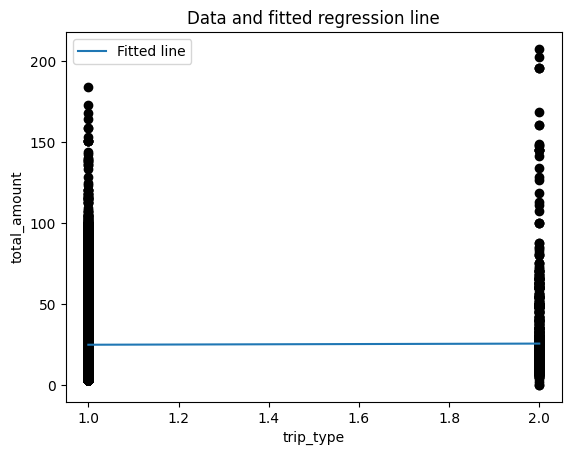

In [ ]:
predictor = "trip_type"
outcome = "total_amount"
data = df_use.copy()
results_ = results_fare_triptype.copy()

# scatter-plot data
x = data[predictor]
y = data[outcome]

# Plot the data
plt.scatter(x, y, color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc['C(trip_type)[T.2.0]']["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### total_amount & payment_type

In [ ]:
# Create OLS model object
model3 = smf.ols("total_amount ~ C(payment_type)", df_use)

# Fit the model
result3 = model3.fit()

# print the result
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     152.7
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           1.14e-98
Time:                        08:21:51   Log-Likelihood:            -3.3686e+05
No. Observations:               79353   AIC:                         6.737e+05
Df Residuals:                   79349   BIC:                         6.738e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 23

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_pay_type = print_coef_std_err(result3)
results_fare_pay_type

,coef,std err
Intercept,23.022399,0.095078
C(payment_type)[T.2.0],2.275345,0.122545
C(payment_type)[T.3.0],-12.357066,1.381497
C(payment_type)[T.4.0],-13.288188,3.873635


$$y = 23.022 + (2.275 \times \text {payment_type_2}) - (12.357 \times \text {payment_type_3}) - (13.288 \times \text {payment_type_4})$$

- `Intercept`
  - The expected average fare of a customer that has payment_type = 1 (Credit Card) [as a baseline], payment_type.2 = 0, payment_type.3 = 0, and payment_type.4 = 0, is \$23.022

- Coefficient in `payment_type = 2 (Cash)`
  - Comparing a Customer with payment_type = 2 and a Customer with payment_type = 1, with the other payment_type = 0, the predicted fare of a customer using payment_type = 2 is \$2.275 higher on average

- Coefficient in `payment_type = 3 (No Charge)`
  - Comparing a Customer with payment_type = 3 and a Customer with payment_type = 1, with the other payment_type = 0, the predicted fare of a customer using payment_type = 3 is \$12.357 lower on average

- Coefficient in `payment_type = 4 (Dispute)`
  - Comparing a Customer with payment_type = 4 and a Customer with payment_type = 1, with the other payment_type = 0, the predicted fare of a customer using payment_type = 4 is \$13.288 lower on average

  

- Visualize the data and regression line

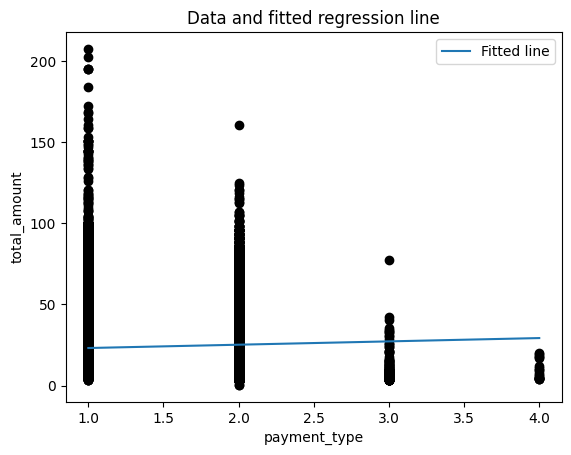

In [ ]:
# Create OLS model object
model3_ = smf.ols("total_amount ~ payment_type", df_use)

# Fit the model
result3_ = model3_.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_pay_type_ = print_coef_std_err(result3_)

predictor = "payment_type"
outcome = "total_amount"
results_ = results_fare_pay_type_.copy()

# scatter-plot data
x = data[predictor]
y = data[outcome]

# Plot the data
plt.scatter(x, y, color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### total_amount & passenger_count

#### Without Transformation

In [ ]:
# Create OLS model object
model4 = smf.ols("total_amount ~ passenger_count", df_use)

# Fit the model
result4 = model4.fit()

# print the result
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     797.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          1.38e-174
Time:                        08:31:08   Log-Likelihood:            -3.3669e+05
No. Observations:               79353   AIC:                         6.734e+05
Df Residuals:                   79351   BIC:                         6.734e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          26.9150      0.108    2

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_psg_cnt = print_coef_std_err(result4)
results_fare_psg_cnt

,coef,std err
Intercept,26.915039,0.108372
passenger_count,-2.137694,0.075697


$$y = 26.915 - (2.137 \times \text {passenger_count})$$

- `Intercept`
  - The expected average fare of a customer that has passenger_count = 0, is \$26.915
  - But, in this data, passenger_count = 0 is not exist, consider transforming passenger_count

- Coefficient in `passenger_count`
  - Comparing a Customer with passenger_count differ in 1 unit is lower \$2.137 on average


  

- Visualize the data and regression line

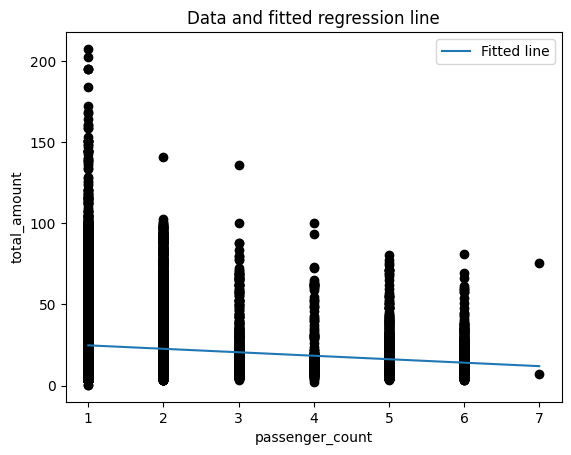

In [ ]:
predictor = "passenger_count"
outcome = "total_amount"
results_ = results_fare_psg_cnt.copy()

# scatter-plot data
x = data[predictor]
y = data[outcome]

# Plot the data
plt.scatter(x, y, color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

#### With centering transformation

- We can center the passenger_count by subtracting each value by its mean/median, but since they are ordinal variables, it's better centering them by the category or baseline that make sense.
- Suppose the baseline of people using Taxi is at least 1 passanger, the baseline defined as 'Occupied'
- It means we set the `Occupied` in passenger_count as the center of the variables by centering
    - The passenger_count will change from [1, 2, 3, 4,5, 6, 7] to [0, -1, -2, -3, -4, -5, -6]

In [ ]:
# copy data
df_tr4 = df_use.copy()
df_tr4.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,1
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,1
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,1
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,1
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,1


In [ ]:
# Look at the statistical summary of passenger_count
df_tr4['passenger_count'].describe()

count    79353.000000
mean         1.194019
std          0.789915
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: passenger_count, dtype: float64

In [ ]:
# centering passenger_count
df_tr4["c_passenger_count"] = df_tr4["passenger_count"] - np.median(df_tr4["passenger_count"])
df_tr4["c_passenger_count"].value_counts()

0.0    72598
1.0     3760
4.0     1208
5.0     1015
2.0      593
3.0      177
6.0        2
Name: c_passenger_count, dtype: int64

In [ ]:
# compare passenger_count before centering
df_use["passenger_count"].value_counts()

1.0    72598
2.0     3760
5.0     1208
6.0     1015
3.0      593
4.0      177
7.0        2
Name: passenger_count, dtype: int64

In [ ]:
# Create OLS model object
model4_2 = smf.ols("total_amount ~ c_passenger_count", df_tr4)

# Fit the model
result4_2 = model4_2.fit()

# print the result
print(result4_2.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     797.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          1.38e-174
Time:                        09:06:08   Log-Likelihood:            -3.3669e+05
No. Observations:               79353   AIC:                         6.734e+05
Df Residuals:                   79351   BIC:                         6.734e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            24.7773      0.06

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_c_psg_cnt = print_coef_std_err(result4_2)
results_fare_c_psg_cnt

,coef,std err
Intercept,24.777345,0.061571
c_passenger_count,-2.137694,0.075697


$$y = 24.777 - (2.137 \times \text {c_passenger_count})$$

- `Intercept`
  - The `intercept`, `$24.777` is the average fare that has passenger_count of baseline, which is 1

- Coefficient in `c_passenger_count`
  - Comparing an average fare when c_passenger_count is different in 1 point is \$2.137 lower
  

- Visualize the data and regression line

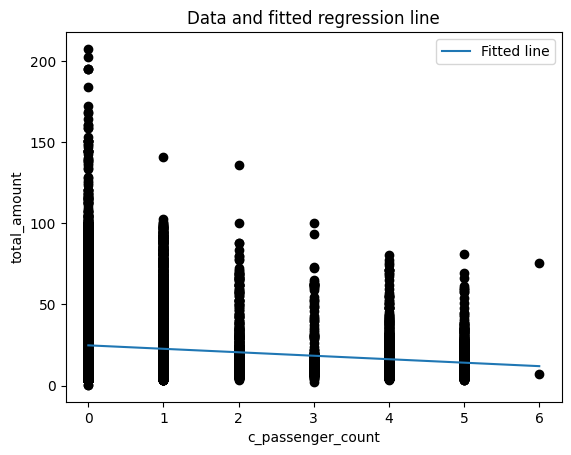

In [ ]:
predictor = "c_passenger_count"
outcome = "total_amount"
data = df_tr4.copy()
results_ = results_fare_c_psg_cnt.copy()

# scatter-plot data
x = data[predictor]
y = data[outcome]

# Plot the data
plt.scatter(x, y, color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### total_amount & trip_distance

#### Without Transformation

In [ ]:
# Create OLS model object
model5 = smf.ols("total_amount ~ trip_distance", df_use)

# Fit the model
result5 = model5.fit()

# print the result
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                 3.582e+05
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:19:09   Log-Likelihood:            -2.6934e+05
No. Observations:               79353   AIC:                         5.387e+05
Df Residuals:                   79351   BIC:                         5.387e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.9985      0.035    284.993

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_distance = print_coef_std_err(result5)
results_fare_distance

,coef,std err
Intercept,9.998500,0.035083
trip_distance,2.915066,0.004870


$$y = 9.998 + (2.915 \times \text {trip_distance})$$

- `Intercept`
  - The expected average fare of a customer that has trip_distance = 0 is \$9.998
  - But trip_distance = 0 is not exist, consider transforming trip_distance

- Coefficient in `trip_distance`
  - The predictive difference comparing average fare of Taxi with 1 unit difference (1 miles) in trip_distance is \$2.915

- Visualize the data and regression line

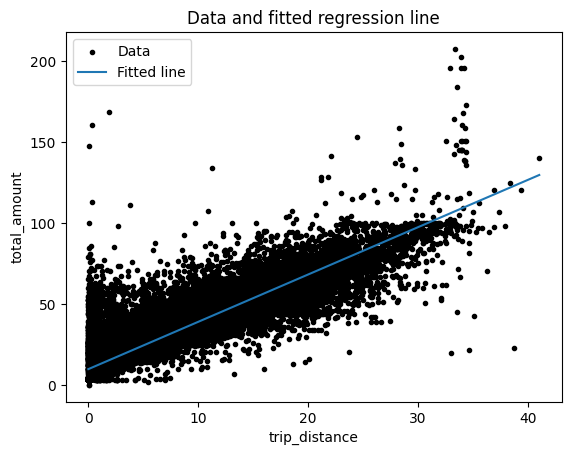

In [ ]:
predictor = "trip_distance"
outcome = "total_amount"
data = df_use.copy()
results_ = results_fare_distance.copy()

# scatter-plot data
x = data[predictor]
y = data[outcome]

# Plot the data
plt.scatter(x, y, marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

#### With Z-score transformation

In [ ]:
# copy data
df_dist = df_use.copy()

In [ ]:
# create z-score transformation
trip_distance_mean = df_dist['trip_distance'].mean()
trip_distance_std = df_dist['trip_distance'].std()
trip_distance = df_dist['trip_distance']

df_dist['z_trip_distance'] = (trip_distance - trip_distance_mean) / trip_distance_std
df_dist['z_trip_distance'].describe()

count    7.935300e+04
mean    -8.022964e-17
std      1.000000e+00
min     -9.359196e-01
25%     -6.580482e-01
50%     -3.858864e-01
75%      2.726308e-01
max      6.876836e+00
Name: z_trip_distance, dtype: float64

In [ ]:
# Create OLS model object
model5_2 = smf.ols("total_amount ~ z_trip_distance", df_dist)

# Fit the model
result5_2 = model5_2.fit()

# print the result
print(result5_2.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                 3.582e+05
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:28:34   Log-Likelihood:            -2.6934e+05
No. Observations:               79353   AIC:                         5.387e+05
Df Residuals:                   79351   BIC:                         5.387e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          24.3626      0.026    9

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_z_distance = print_coef_std_err(result5_2)
results_fare_z_distance

,coef,std err
Intercept,24.362591,0.025590
z_trip_distance,15.316422,0.025591


In [ ]:
print(f'Average of a trip distance is {trip_distance_mean:.3f} miles.')
print(f'Standard Deviation of a trip distance is {trip_distance_std:.3f} miles')

Average of a trip distance is 4.928 miles.
Standard Deviation of a trip distance is 5.254 miles


$$y = 24.362 + (15.316 \times \text {z_trip_distance})$$

- `Intercept`
  - The `intercept`, \$24.362 is the average fare of Taxi when it has z_trip_distance = 0 or that's also mean an average trip_distance (4.928 miles)

- Coefficient in `trip_distance`
  - The predictive difference comparing fare of Taxi with 1 standard deviation difference (5.254 miles) in z_trip_distance is \$15.31 on average

- Visualize the data and regression line

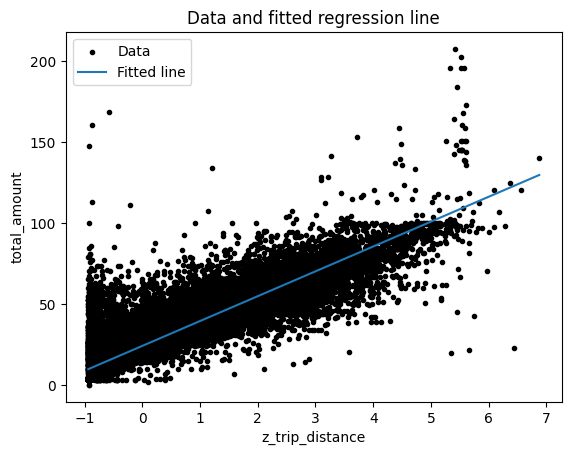

In [ ]:
predictor = "z_trip_distance"
outcome = "total_amount"
data = df_dist.copy()
results_ = results_fare_z_distance.copy()

# scatter-plot data
x = data[predictor]
y = data[outcome]

# Plot the data
plt.scatter(x, y, marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### total_amount & extra

In [ ]:
# value of extra
df_use['extra'].value_counts()

 0.00    34069
 2.75    25080
 1.00     9259
 0.50     7955
 5.50     1498
 1.35      834
 3.75      306
 3.25      160
 8.25       84
 4.10       73
 4.50       21
 6.85        8
-2.75        4
 1.75        2
Name: extra, dtype: int64

In [ ]:
# Create OLS model object
model6 = smf.ols("total_amount ~ extra", df_use)

# Fit the model
result6 = model6.fit()

# print the result
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                 1.186e+04
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:30:54   Log-Likelihood:            -3.3155e+05
No. Observations:               79353   AIC:                         6.631e+05
Df Residuals:                   79351   BIC:                         6.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0690      0.074    257.049      0.0

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_extra = print_coef_std_err(result6)
results_fare_extra

,coef,std err
Intercept,19.068952,0.074184
extra,4.451126,0.040864


$$y = 19.069 + (4.451 \times \text {extra})$$

- `Intercept`
  - The `intercept`, \$19.069 is the average fare of Taxi when it has extra = 0
  - extra = 0 is safe to say when customer use taxi not in Rush Hour and not in Over night

- Coefficient in `extra`
  - The predictive difference comparing fare of Taxi with 1 unit difference (1 US Dollar) in extra is \$4.451 on average

- Visualize the data and regression line

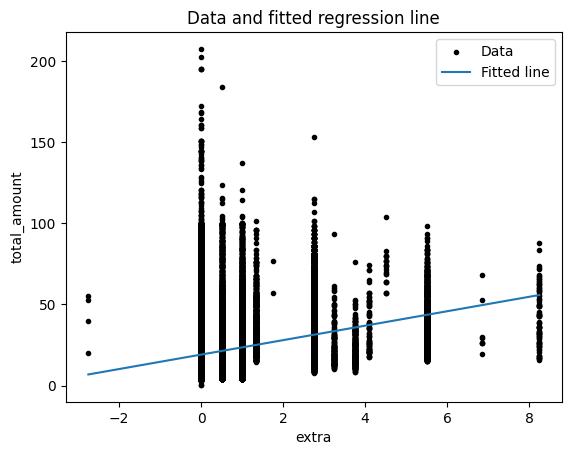

In [ ]:
predictor = "extra"
outcome = "total_amount"
data = df_use.copy()
results_ = results_fare_extra.copy()

# scatter-plot data
x = data[predictor]
y = data[outcome]

# Plot the data
plt.scatter(x, y, marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### total_amount & tip_amount

In [ ]:
# value of tip_amount
df_use['tip_amount'].value_counts()

0.00     53616
2.00      1555
1.00      1515
3.00      1001
1.56       360
         ...  
10.47        1
17.42        1
7.94         1
8.03         1
14.05        1
Name: tip_amount, Length: 1295, dtype: int64

In [ ]:
# Create OLS model object
model7 = smf.ols("total_amount ~ tip_amount", df_use)

# Fit the model
result7 = model7.fit()

# print the result
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2208.
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:47:12   Log-Likelihood:            -3.3599e+05
No. Observations:               79353   AIC:                         6.720e+05
Df Residuals:                   79351   BIC:                         6.720e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.0540      0.065    352.023      0.0

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_tip = print_coef_std_err(result7)
results_fare_tip

,coef,std err
Intercept,23.054025,0.065490
tip_amount,1.214015,0.025836


$$y = 23.054 + (1.214 \times \text {tip_amount})$$

- `Intercept`
  - The `intercept`, \$23.054 is the average fare of Taxi when it has tip_amount = 0

- Coefficient in `tip_amount`
  - The predictive difference comparing average fare of Taxi with 1 unit difference (1 US Dollar) in tip_amount is \$1.214 on average

- Visualize the data and regression line

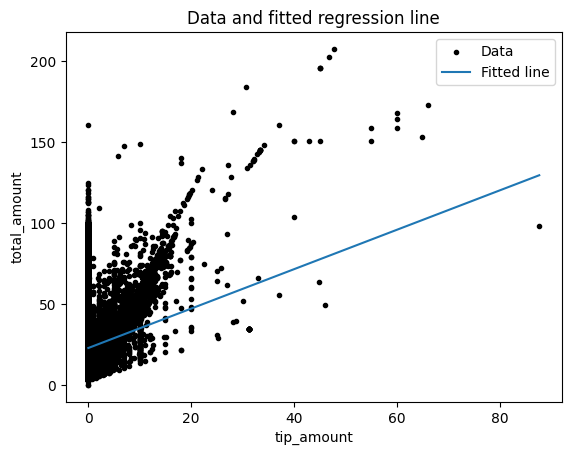

In [ ]:
predictor = "tip_amount"
outcome = "total_amount"
data = df_use.copy()
results_ = results_fare_tip.copy()

# scatter-plot data
x = data[predictor]
y = data[outcome]

# Plot the data
plt.scatter(x, y, marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### total_amount & tolls_amount

In [ ]:
# value of tolls_amount
df_use['tolls_amount'].value_counts()

0.00     71607
6.55      6507
2.45       411
3.00       338
6.12       133
13.10      111
9.00        71
13.75       43
11.75       33
9.55        22
2.29        18
4.90        13
18.30        9
19.65        4
20.30        4
23.50        4
8.41         3
10.17        3
27.50        3
2.75         3
2.80         2
8.21         1
26.85        1
0.40         1
20.00        1
11.45        1
17.87        1
30.05        1
11.13        1
12.00        1
26.20        1
16.75        1
Name: tolls_amount, dtype: int64

In [ ]:
# Create OLS model object
model8 = smf.ols("total_amount ~ tolls_amount", df_use)

# Fit the model
result8 = model8.fit()

# print the result
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                 4.253e+04
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:53:51   Log-Likelihood:            -3.2005e+05
No. Observations:               79353   AIC:                         6.401e+05
Df Residuals:                   79351   BIC:                         6.401e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       21.2187      0.051    417.467   

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_tolls = print_coef_std_err(result8)
results_fare_tolls

,coef,std err
Intercept,21.218661,0.050827
tolls_amount,5.030415,0.024391


$$y = 21.218 + (5.030 \times \text {tolls_amount})$$

- `Intercept`
  - The `intercept`, \$21.218 is the average fare of Taxi when it has tolls_amount = 0

- Coefficient in `tolls_amount`
  - The predictive difference comparing average fare of Taxi with 1 unit difference (1 US Dollar) in tolls_amount is \$5.030 on average

- Visualize the data and regression line

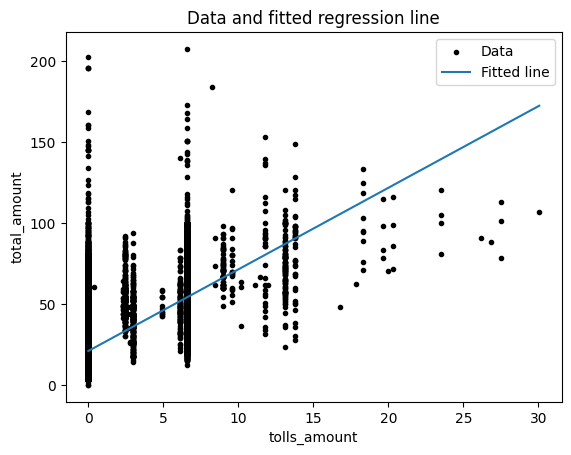

In [ ]:
predictor = "tolls_amount"
outcome = "total_amount"
data = df_use.copy()
results_ = results_fare_tolls.copy()

# scatter-plot data
x = data[predictor]
y = data[outcome]

# Plot the data
plt.scatter(x, y, marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### total_amount & improvement_surcharge

In [ ]:
# Create OLS model object
model9 = smf.ols("total_amount ~ improvement_surcharge", df_use)

# Fit the model
result9 = model9.fit()

# print the result
print(result9.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.251
Date:                Mon, 01 Jan 2024   Prob (F-statistic):             0.0714
Time:                        09:57:08   Log-Likelihood:            -3.3708e+05
No. Observations:               79353   AIC:                         6.742e+05
Df Residuals:                   79351   BIC:                         6.742e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                31.55

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_imp_sur = print_coef_std_err(result9)
results_fare_imp_sur

,coef,std err
Intercept,31.555556,3.989917
improvement_surcharge,-23.981988,13.301231


$$y = 31.555 - (23.982 \times \text {improvement_surcharge})$$

- `Intercept`
  - The `intercept`, \$31.555 is the average fare of Taxi when it has improvement_surcharge = 0

- Coefficient in `improvement_surcharge`
  - The predictive difference comparing average fare of Taxi with 1 unit difference (1 US Dollar) in improvement_surcharge is \$23.982 on average

- Visualize the data and regression line

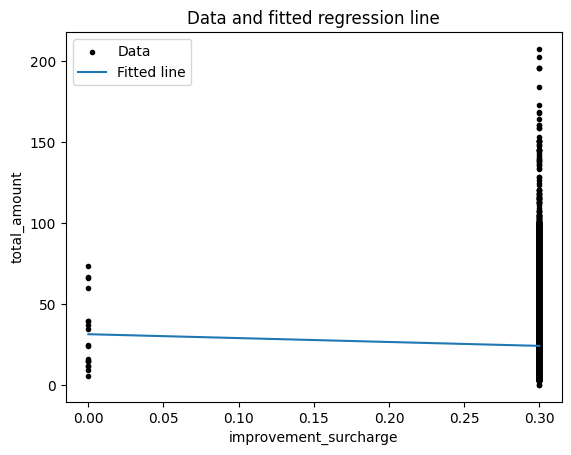

In [ ]:
predictor = "improvement_surcharge"
outcome = "total_amount"
data = df_use.copy()
results_ = results_fare_imp_sur.copy()

# scatter-plot data
x = data[predictor]
y = data[outcome]

# Plot the data
plt.scatter(x, y, marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### total_amount & congestion_surcharge

In [ ]:
# Create OLS model object
model10 = smf.ols("total_amount ~ congestion_surcharge", df_use)

# Fit the model
result10 = model10.fit()

# print the result
print(result10.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     190.1
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           3.32e-43
Time:                        09:59:32   Log-Likelihood:            -3.3699e+05
No. Observations:               79353   AIC:                         6.740e+05
Df Residuals:                   79351   BIC:                         6.740e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               24.7094 

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_con_sur = print_coef_std_err(result10)
results_fare_con_sur

,coef,std err
Intercept,24.709434,0.065079
congestion_surcharge,-0.844323,0.061230


$$y = 24.709 - (0.844 \times \text {congestion_surcharge})$$

- `Intercept`
  - The `intercept`, \$24.709 is the average fare of Taxi when it has congestion_surcharge = 0

- Coefficient in `congestion_surcharge`
  - The predictive difference comparing average fare of Taxi with 1 unit difference (1 US Dollar) in congestion_surcharge is \$0.844 on average

- Visualize the data and regression line

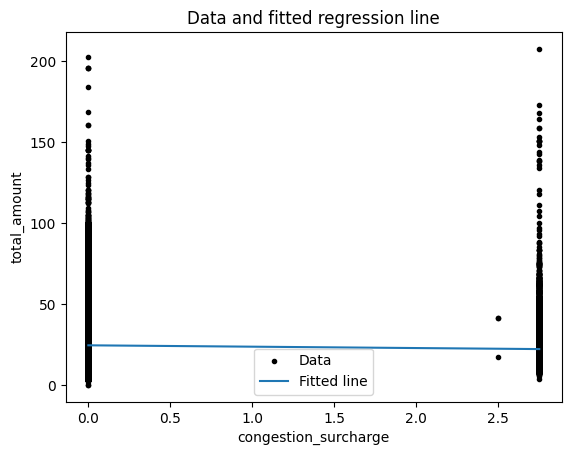

In [ ]:
predictor = "congestion_surcharge"
outcome = "total_amount"
data = df_use.copy()
results_ = results_fare_con_sur.copy()

# scatter-plot data
x = data[predictor]
y = data[outcome]

# Plot the data
plt.scatter(x, y, marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### total_amount & is_rushour

In [ ]:
# Create OLS model object
model11 = smf.ols("total_amount ~ C(is_rushour)", df_use)

# Fit the model
result11 = model11.fit()

# print the result
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           6.93e-52
Time:                        10:19:17   Log-Likelihood:            -3.3697e+05
No. Observations:               79353   AIC:                         6.739e+05
Df Residuals:                   79351   BIC:                         6.740e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             24.8226      0

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_rush = print_coef_std_err(result11)
results_fare_rush

,coef,std err
Intercept,24.822631,0.067237
C(is_rushour)[T.1],-2.260544,0.149045


$$y = 24.363 - (2.260 \times \text {is_rushour_1})$$

- `Intercept`
  - The expected average fare of a customer that has is_rushour = 0 (Not in Rush Hour) [as a baseline], is \$24.363

- Coefficient in `is_rushour_1 (Trip in Rush Hour)`
  - Comparing a Customer with is_rushour_1 and a Customer with is_rushour_0, the predicted average fare on a trip of is_rushour_1 is \$2.26 lower on average


- Visualize the data and regression line

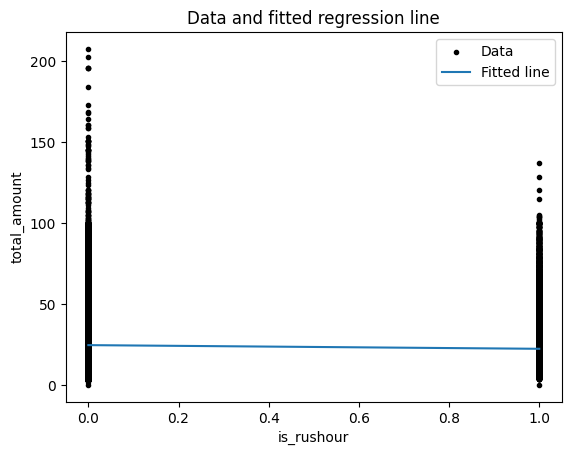

In [ ]:
predictor = "is_rushour"
outcome = "total_amount"
data = df_use.copy()
results_ = results_fare_rush.copy()

# scatter-plot data
x = data[predictor]
y = data[outcome]

# Plot the data
plt.scatter(x, y, marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc["C(is_rushour)[T.1]"]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### total_amount & is_overnight

In [ ]:
# Create OLS model object
model12 = smf.ols("total_amount ~ C(is_overnight)", df_use)

# Fit the model
result12 = model12.fit()

# print the result
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.085
Date:                Mon, 01 Jan 2024   Prob (F-statistic):              0.149
Time:                        10:19:26   Log-Likelihood:            -3.3708e+05
No. Observations:               79353   AIC:                         6.742e+05
Df Residuals:                   79351   BIC:                         6.742e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               24.3225 

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_ovn = print_coef_std_err(result12)
results_fare_ovn

,coef,std err
Intercept,24.322480,0.066202
C(is_overnight)[T.1],0.227839,0.157781


$$y = 24.322 + (0.228 \times \text {is_overnight_1})$$

- `Intercept`
  - The expected average fare of a customer that has is_overnight = 0 (Not in Over Night) [as a baseline], is \$24.322

- Coefficient in `is_overnight_1 (Trip in Over Night)`
  - Comparing a Customer with is_overnight_1 and a Customer with is_overnight_0, the predicted average fare on a trip of is_overnight_1 is \$0.228 higher on average


- Visualize the data and regression line

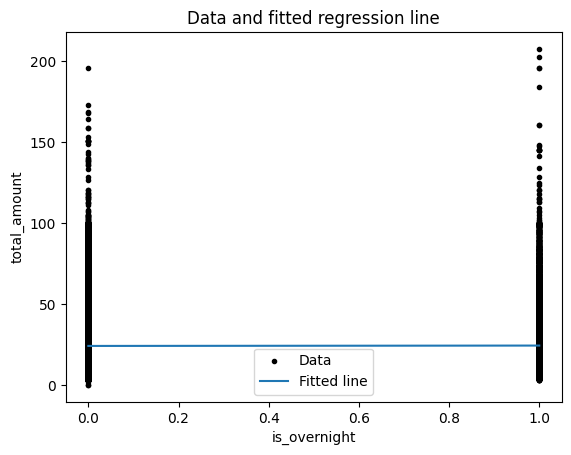

In [ ]:
predictor = "is_overnight"
outcome = "total_amount"
data = df_use.copy()
results_ = results_fare_ovn.copy()

# scatter-plot data
x = data[predictor]
y = data[outcome]

# Plot the data
plt.scatter(x, y, marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc["C(is_overnight)[T.1]"]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

## Compare Model with Interaction

### Without Interaction

In [ ]:
# copy data
df_dist = df_use.copy()

In [ ]:
# create z-score transformation
trip_distance_mean = df_dist['trip_distance'].mean()
trip_distance_std = df_dist['trip_distance'].std()
trip_distance = df_dist['trip_distance']

df_dist['z_trip_distance'] = (trip_distance - trip_distance_mean) / trip_distance_std
df_dist['z_trip_distance'].describe()

count    7.935300e+04
mean    -8.022964e-17
std      1.000000e+00
min     -9.359196e-01
25%     -6.580482e-01
50%     -3.858864e-01
75%      2.726308e-01
max      6.876836e+00
Name: z_trip_distance, dtype: float64

In [ ]:
# Create OLS model object
model_itr_1 = smf.ols("total_amount ~ z_trip_distance + is_rushour", df_dist)

# Fit the model
result_itr_1 = model_itr_1.fit()

# print the result
print(result_itr_1.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                 1.791e+05
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:19:09   Log-Likelihood:            -2.6934e+05
No. Observations:               79353   AIC:                         5.387e+05
Df Residuals:                   79350   BIC:                         5.387e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          24.3426      0.029    8

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_trip_rush = print_coef_std_err(result_itr_1)
results_fare_trip_rush

,coef,std err
Intercept,24.342634,0.028685
z_trip_distance,15.318869,0.025640
is_rushour,0.098065,0.063684


In [ ]:
print(f'Average of a trip distance is {trip_distance_mean:.3f} miles.')
print(f'Standard Deviation of a trip distance is {trip_distance_std:.3f} miles')

Average of a trip distance is 4.928 miles.
Standard Deviation of a trip distance is 5.254 miles


$$y = 24.343 + (15.318 \times \text {z_trip_distance}) + (0.098 \times \text {is_rushour})$$

- `Intercept`
  - The average fare of Taxi when the z_trip_distance = 0 or trip_distance is average (4.928 miles) and is_rushour = 0 (Not in Rush Hour), is \$24.343

- Coefficient in `z_trip_distance`
  - The predictive difference comparing fare of Taxi with 1 standard deviation difference (5.254 miles) in trip_distance and is_rushour = 0 (Not in Rush Hour), is \$15.318 on average

- Coefficient in `is_rushour`
  - The predictive difference comparing fare of Taxi with the same z_trip_distance, is_rushour = 1 has average fare \$0.098 higher compare to is_rushour = 0

- Visualize the data and regression line

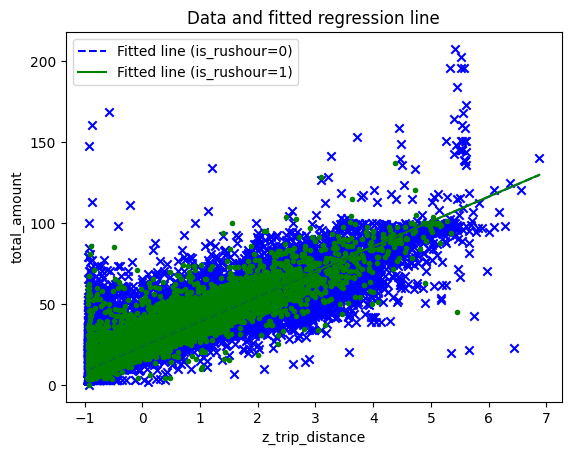

In [ ]:
predictors = ["z_trip_distance","is_rushour"]
outcome = "total_amount"
data = df_dist.copy()
results_ = results_fare_trip_rush.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : "x", 1: "."}

# Plot the data
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome],
                color = c[i],
                marker = markers[i])

# x value as z_trip_distance predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)


# Calculate the fitted values for two lines regarding the is_rushour (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]


# y_hat = beta_0_hat + \beta_1_hat * is_rushour + \beta_2_hat * z_trip_distance
fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i for i in range(2)]


# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (is_rushour={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

- From the figure, the slope in regression model of total_amount (Fare taxi on z_trip_distance was required to be identical across subgroups defined by is_rushour.
- However, if we look the data in figure, it suggests that the slopes differ a little bit substantially
- To address this, include an interaction between z_trip_distance and is_rushour, resulting in a new predictor defined as the product of these two variables.
- This will permits the slope to differ between subgroups.

### With Interaction

In [ ]:
# copy data
df_dist = df_use.copy()

In [ ]:
# create z-score transformation
trip_distance_mean = df_dist['trip_distance'].mean()
trip_distance_std = df_dist['trip_distance'].std()
trip_distance = df_dist['trip_distance']

df_dist['z_trip_distance'] = (trip_distance - trip_distance_mean) / trip_distance_std
df_dist['z_trip_distance'].describe()

count    7.935300e+04
mean    -8.022964e-17
std      1.000000e+00
min     -9.359196e-01
25%     -6.580482e-01
50%     -3.858864e-01
75%      2.726308e-01
max      6.876836e+00
Name: z_trip_distance, dtype: float64

In [ ]:
# Create OLS model object
model_itr_2 = smf.ols("total_amount ~ z_trip_distance + is_rushour\
                                       + z_trip_distance:is_rushour", df_dist)

# Fit the model
result_itr_2 = model_itr_2.fit()

# print the result
print(result_itr_2.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                 1.198e+05
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:51:17   Log-Likelihood:            -2.6924e+05
No. Observations:               79353   AIC:                         5.385e+05
Df Residuals:                   79349   BIC:                         5.385e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_fare_trip_rush_i = print_coef_std_err(result_itr_2)
results_fare_trip_rush_i

,coef,std err
Intercept,24.347768,0.028650
z_trip_distance,15.155024,0.028013
is_rushour,0.195040,0.063955
z_trip_distance:is_rushour,0.996474,0.069083


In [ ]:
print(f'Average of a trip distance is {trip_distance_mean:.3f} miles.')
print(f'Standard Deviation of a trip distance is {trip_distance_std:.3f} miles')

Average of a trip distance is 4.928 miles.
Standard Deviation of a trip distance is 5.254 miles


$$y = 24.347 + (15.155 \times \text {z_trip_distance}) + (0.195 \times \text {is_rushour}) + (0.996 \times \text {z_trip_distance * is_rushour})$$

- `Intercept`
  - The average fare of Taxi is \$24.347, when:
    - z_trip_distance is 0, or on its average (4.928 miles)
    - is_rushour = 0 (Not in Rush Hour)

- Coefficient in `z_trip_distance`
  - The average fare of Taxi in comparing fare of Taxi with 1 standard deviation difference (5.254 miles) is \$15.155 higher, when:
    - is_rushour = 0 (Not in Rush Hour)

- Coefficient in `is_rushour`
  - The predictive difference comparing fare of Taxi with the trip_distance is average (4.928 miles), is_rushour = 1 has average fare \$0.195 higher compare to is_rushour = 0

- Coefficient in `interaction term`
  $$\text{is_rushour}=0, \text{fare} = 24.347 + 15.155 \text{z_trip_distance}$$
  - The estimated difference between fares whose is_rushour = 0 but differ 1 std in z_trip_distance is \$15.155

  $$\text{is_rushour}=1, \text{fare} = 24.152 + 16.151\text{z_trip_distance}$$
  - The estimated difference between fares whose is_rushour = 1 but differ 1 std in z_trip_distance is \$16.151

- Visualize the data and regression line

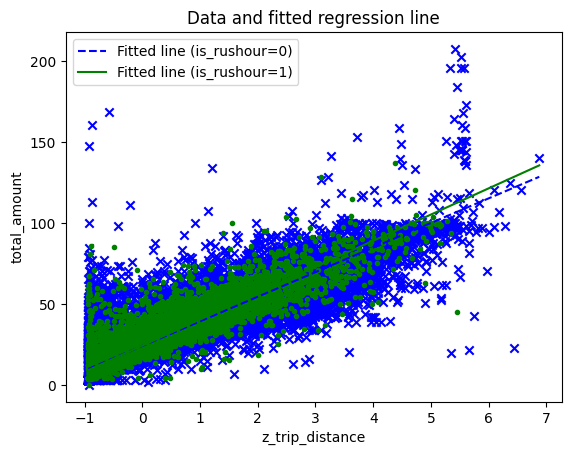

In [ ]:
predictors = ["z_trip_distance","is_rushour","z_trip_distance:is_rushour"]
outcome = "total_amount"
data = df_dist.copy()
results_ = results_fare_trip_rush_i.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : "x", 1: "."}

# Plot the data
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome],
                color = c[i], marker = markers[i])

# Calculate the fitted values for two lines regarding the is_rushour
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (is_rushour={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

- The slope differ between the two groups in the model that include interaction
- However, the difference between model that use interaction and not use interaction in this variable is not much different. The result R squared is still the same
- If we look at the EDA result, average fare of RatecodeID 2 and 3 Should be lower. But, since RatecodeID 1 and 5 is way more than Ratecode ID 2 and 3, it's the reason why average fare on Rush Hour is higher.

## Final Model

We already look at the result of one variable linear regression. If we look at the R-squared of the 12 models, there are some models that has R-square < 0.1

Consider only use variable independent that has R-Squared mroe than 0.1

### Create Model

In [12]:
# copy data
df_final = df_use.copy()

In [13]:
# create z-score transformation on trip_distance
trip_distance_mean = df_final['trip_distance'].mean()
trip_distance_std = df_final['trip_distance'].std()
trip_distance = df_final['trip_distance']

df_final['z_trip_distance'] = (trip_distance - trip_distance_mean) / trip_distance_std
df_final['z_trip_distance'].describe()

count    7.935300e+04
mean    -8.022964e-17
std      1.000000e+00
min     -9.359196e-01
25%     -6.580482e-01
50%     -3.858864e-01
75%      2.726308e-01
max      6.876836e+00
Name: z_trip_distance, dtype: float64

In [14]:
# create z-score transformation on tolls_amount
tolls_amount_mean = df_final['tolls_amount'].mean()
tolls_amount_std = df_final['tolls_amount'].std()
tolls_amount = df_final['tolls_amount']

df_final['z_tolls_amount'] = (tolls_amount - tolls_amount_mean) / tolls_amount_std
df_final['z_tolls_amount'].describe()

count    7.935300e+04
mean    -1.203445e-16
std      1.000000e+00
min     -3.143927e-01
25%     -3.143927e-01
50%     -3.143927e-01
75%     -3.143927e-01
max      1.480199e+01
Name: z_tolls_amount, dtype: float64

In [15]:
# create z-score transformation on extra
extra_mean = df_final['extra'].mean()
extra_std = df_final['extra'].std()
extra = df_final['extra']

df_final['z_extra'] = (extra - extra_mean) / extra_std
df_final['z_extra'].describe()

count    7.935300e+04
mean    -4.584551e-17
std      1.000000e+00
min     -2.871991e+00
25%     -8.670628e-01
50%     -5.025304e-01
75%      1.137865e+00
max      5.147722e+00
Name: z_extra, dtype: float64

In [16]:
# Create OLS model object
model_use = smf.ols("total_amount ~ z_trip_distance + z_extra + z_tolls_amount\
                                    + C(RatecodeID)", df_final)

# Fit the model
result_use = model_use.fit()

# print the result
print(result_use.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 6.587e+04
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:15:33   Log-Likelihood:            -2.6096e+05
No. Observations:               79353   AIC:                         5.219e+05
Df Residuals:                   79345   BIC:                         5.220e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               22.1481 

- Here we can see that each variable has low standard error, it means all the variable has low uncertainty in the coefficient
- The performance of the model is good, the model can explain 85.3% variance of NYC Fare Taxi

### Interpretation Model with Transformation

In [ ]:
print(f'Average of a trip distance is {trip_distance_mean:.3f} miles.')
print(f'Standard Deviation of a trip distance is {trip_distance_std:.3f} miles')

Average of a trip distance is 4.928 miles.
Standard Deviation of a trip distance is 5.254 miles


In [ ]:
print(f'Average of a ectra is ${extra_mean:.3f}.')
print(f'Standard Deviation of a ectra is ${extra_std:.3f}')

Average of a ectra is $1.189.
Standard Deviation of a ectra is $1.372


In [ ]:
print(f'Average of a tolls_amount is ${tolls_amount_mean:.3f}.')
print(f'Standard Deviation of a tolls_amount is ${tolls_amount_std:.3f}')

Average of a tolls_amount is $0.625.
Standard Deviation of a tolls_amount is $1.988


In [ ]:
# Extract the results (Coefficient and Standard Error) to DataFrame
results_final = print_coef_std_err(result_use)
results_final

,coef,std err
Intercept,22.148106,0.035817
C(RatecodeID)[T.2.0],15.135405,0.567101
C(RatecodeID)[T.3.0],23.868975,1.574321
C(RatecodeID)[T.4.0],17.671955,1.053750
C(RatecodeID)[T.5.0],5.254793,0.066059
z_trip_distance,13.698374,0.029988
z_extra,0.708945,0.032100
z_tolls_amount,0.999420,0.029118


**Model of Linear Regression**

$fare = \beta_0 + (\beta_1 \times \text {RatecodeID_2}) + (\beta_2 \times \text {RatecodeID_3}) + (\beta_3 \times \text {RatecodeID_4}) + (\beta_4 \times \text {RatecodeID_5}) + (\beta_5 \times \text {z_trip_distance}) + (\beta_6 \times \text {z_extra}) + (\beta_7 \times \text {z_tolls_amount})$

**Model of Linear Regression**

$fare = 22.148 + (15.135 \times \text {RatecodeID_2}) + (23.869 \times \text {RatecodeID_3}) + (17.672 \times \text {RatecodeID_4}) + (5.255 \times \text {RatecodeID_5}) + (13.698 \times \text {z_trip_distance}) + (0.709 \times \text {z_extra}) +  (0.999 \times \text {z_tolls_amount})$

RatecodeID = 1 is the baseline

- `Intercept`
  - The expected average fare is is \$22.148, when:
    - Ratecode = 1 (Standard Rate) [as a baseline]
    - z_trip_distance = 0
    - z_extra = 0
    - z_tolls_amount = 0

- Coefficient in `RatecodeID = 2 (Trip to JFK Airport)`
  - Comparing a Customer with RatecodeID = 2 and a Customer with RatecodeID = 1, with the same z_trip_distance, z_extra, and z_tolls_amount. The predicted average fare on a RatecodeID = 2 is \$15.135 higher on average

- Coefficient in `RatecodeID = 3 (Trip to Newark Airport)`
  - Comparing a Customer with RatecodeID = 3 and a Customer with RatecodeID = 1, with the same z_trip_distance, z_extra, and z_tolls_amount, the predicted average fare on a RatecodeID = 3 is \$23.869 higher on average

- Coefficient in `RatecodeID = 4 (Trip to Nassau / Westchester)`
  - Comparing a Customer with RatecodeID = 4 and a Customer with RatecodeID = 1, with the same z_trip_distance, z_extra, and z_tolls_amount, the predicted average fare on a RatecodeID = 4 is \$17.672 higher on average

- Coefficient in `RatecodeID = 5 (Negotiated Fares)`
  - Comparing a Customer with RatecodeID = 5 and a Customer with RatecodeID = 1, with the same z_trip_distance, z_extra, and z_tolls_amount, the predicted average fare on a RatecodeID = 5 is \$5.255 higher on average

- Coefficient in `z_trip_distance`
  - Comparing a Customer with RatecodeID = 1, with the same z_extra, and z_tolls_amount, but differ in 1 standard deviation z_trip_distance is \$13.698 higher on average

- Coefficient in `z_extra`
  - Comparing a Customer with RatecodeID = 1, with the same z_trip_distance and z_tolls_amount, but differ in 1 standard deviation z_extra is \$0.709 higher on average

- Coefficient in `z_tolls_amount`
  - Comparing a Customer with RatecodeID = 1,  with the same z_trip_distance and z_extra, but differ in 1 standard deviation z_tolls_amount is \$0.999 higher on average
  

### Error

- Plot the residual from the fitted line / fitted Values / y_hat

Text(0.5, 1.0, 'Residuals vs. Predicted fare')

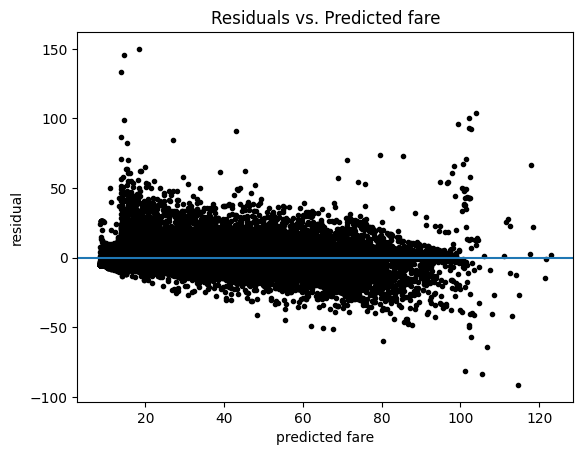

In [ ]:
plt.scatter(result_use.fittedvalues, result_use.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted fare")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted fare")

- Some of predicted values are have positive residual (the predicted values are lower than the actual data) and some other have negative residual (the predicted values are higher the actual data)
- However the assumption of equal variance of error is minor for the purpose of estimating regression line.

### Model Evaluation

In [17]:
class StatsmodelsRegressor(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """

    def __init__(self, sm_class, sm_formula):
        self.sm_class = sm_class
        self.sm_formula = sm_formula
        self.model = None
        self.result = None

    def fit(self, data, dummy):
        self.model = self.sm_class(self.sm_formula, data)
        self.result = self.model.fit()

    def predict(self,X):
        return self.result.predict(X)

def kfold_split(data, n_fold):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel
    :param n_fold: <int> Number of fold in k-fold CV
    :return df: <pandas DataFrame>  combined estimated coefficient and standard error of model estimate
    """
    kfold = KFold(n_splits = n_fold,
                  shuffle = True,
                  random_state=123)
    fold_train = {}
    fold_test = {}

    for i, (train, test) in enumerate(kfold.split(data)):
        print(f"fold {i+1}, train data rows: {len(train)}, test data rows: {len(test)}")
        fold_train[i] = data.iloc[train].copy()
        fold_test[i] = data.iloc[test].copy()

    return (fold_train, fold_test)

In [18]:
df_final.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight,z_trip_distance,z_tolls_amount,z_extra
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,...,1.0,0.0,4.733333,3,0,0,1,-0.709435,-0.314393,-0.50253
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,...,1.0,0.0,35.916667,3,0,0,1,1.667698,-0.314393,-0.50253
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,...,1.0,0.0,6.033333,3,0,0,1,-0.757016,-0.314393,-0.50253
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,...,1.0,0.0,5.716667,3,0,0,1,-0.701822,-0.314393,-0.50253
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,...,1.0,0.0,7.233333,3,0,0,1,-0.728468,-0.314393,-0.50253


create model

In [19]:
# Create a class model

ols_fare_pred = StatsmodelsRegressor(smf.ols, "total_amount ~ z_trip_distance \
                                                              + z_extra\
                                                              + z_tolls_amount\
                                                              + C(RatecodeID)")

evaluate model using  K-fold cross validation

In [20]:
# Create k-fold splitter object

kfold = KFold(n_splits=5, shuffle = True, random_state=123)

calculate performance each model

In [21]:
scores_ols_fare_pred = cross_val_score(estimator = ols_fare_pred,
                                       X = df_final,
                                       y = df_final["total_amount"],
                                       cv = kfold,
                                       scoring = "r2")
scores_ols_fare_pred = pd.DataFrame(data = scores_ols_fare_pred,
                                    columns=["test_rsquared"])
scores_ols_fare_pred["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_fare_pred

,test_rsquared,folds
0,0.851689,Folds 1
1,0.850040,Folds 2
2,0.853749,Folds 3
3,0.861574,Folds 4
4,0.848059,Folds 5


In [22]:
scores_ols_fare_pred["test_rsquared"].mean()

0.8530220224051913

In [23]:
print(result_use.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 6.587e+04
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:34:57   Log-Likelihood:            -2.6096e+05
No. Observations:               79353   AIC:                         5.219e+05
Df Residuals:                   79345   BIC:                         5.220e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               22.1481 

The model have a good fit, it can explain 85.3% variance of total_amount / fares.


### Limitation
- The linear regression model has many limitation. The model only predicted fares based on RatecodeID, trip_distance, extra and tolls amount.
- But, in reality, fare of Taxi could depends on many things beside what stated in model, such as traffic, weather, route, etc.
- Also, the value of trip distance, extra, and tolls amount is limited only to the range of what the data have train for model predictions. It won't be trustworthy if you use data outside of the range using this model to predict Fare.

## Business Insight

### Which Conditions is the best to use NYC Taxi

Based on EDA 1 Variable, EDA 2 Variable and EDA Multi Variable, we can conclude that:

- Most of the customer uses taxi alone (passenger_Count = 1),  72.598 of 79.353 orders are passenger_count = 1. Compared to passenger_count = 1 to assenger_count = 6, passenger_count = 1 has the highest avg_fare.

- If we compare the correlation of total_amount (fare of Taxi), distance and passenger_count, the fare is more correlated with distance rather than passenger_count. It'll be more cheap as the customer to use taxi with their friend or accompany, so they can share the fare together.

- Most of the customer use taxi for Standard Rate (RatecodeID = 1; Standard Rate) and/or Negotiated Fare (RatecodeID = 5; Negotiated Fare). Compared to RatecodeID 1 and 5, Ratecode = 2 (Trip To JFK Airport), Ratecode = 2 (Trip To Newark Airport), and Ratecode = 4 (Trip To Nassau County or Westchester County) has higher average fare.

- Most of the user that use NYC Taxi use payment type 2 (Cash) as their payment method compared to Payment Type 1 (Credit Card). That's why payment type 2 (Cash) has higher average fare compared to Payment Type 1 (Credit Card).

- Average fare in trip_type 1 and trip_type 2 is not that much different

- The average fare that using NYC Taxi in Not Rush hour is higher than in Rush Hour.

- The average fare that using Taxi in over night is higher than that is not.

Comparing each Ratecode ID in Rush Hour:

- Between RatecodeID 1 (Standard Rate) and RatecodeID 5 (Negotiated Fare)
  - On Average, customer that's on longer trip use RatecodeID 5
  - On average, a customer pay more (has higher fare) when using RatecodeID 5, that's also because they have a longer trip distance and longer trip time
  - Overall, the total order RatecodeID 1 is higher than RatecodeID 5
  - Overall customer prefer to use RatecodeID 1 on shorter distance and RatecodeID 5 on longer distance
  - In Rush Hour, Average Distance Ratecode 1 and Ratecode 5 is a little bit lower than when in not Rush Hour
  - But, when in Rush Hour, Average Time Trip Ratecode 1 and Ratecode 5 is higher than when in not Rush Hour

- Between RatecodeID 2 (Trip to JFK Airport), RatecodeID 3 (Trip to Newark Airport) and RatecodeID 4 (Trip To Nassau County or Westchester County)
  - On average, Trip to JFK (RatecodeID 2) and Trip to Newark Airport (RatecodeID 3) has higher average Fare and time trip in the rush hour
  - On Average, Trip To Nassau County or Westchester County(ratecodeID 4) has lower Average Fare and trip time when not in rush hour

Comparing each Ratecode ID in Over Night:

- Between RatecodeID 1 (Standard Rate) and RatecodeID 5 (Negotiated Fare)
  - On Average, customer that's on longer trip use RatecodeID 5
  - On average, a customer pays more (has higher fare) when using RatecodeID 5, that's also because they have a longer trip distance and longer trip time
  - Overall, the total order RatecodeID 1 is higher than RatecodeID 5
  - Overall customer prefer to use RatecodeID 1 on shorter distance and RatecodeID 5 on longer distance
  - In Overnight, Average Distance Ratecode 1 and Ratecode 5 is a little bit higher than when in not Overnight
  - But, when in Overnight, Average Time Trip Ratecode 1 and Ratecode 5 is lower than when in not Overnight
  - On Average, the average fare in overnight is higher than when in not overnight

- Between RatecodeID 2 (Trip to JFK Airport), RatecodeID 3 (Trip to Newark Airport) and RatecodeID 4 (Trip To Nassau County or Westchester County)
  - On average, Trip to JFK (RatecodeID 2) and Trip to Newark Airport (RatecodeID 3) has lower average Fare, trip distance and time trip in the Overnight
  - On Average, Trip To Nassau County or Westchester County(ratecodeID 4) has higher Average Fare and distance when in Overnight

### Summary of Statistical Test

#### Test on average fare of Ratecode 1 and 5
Test if the Average of Fare from Ratecode 1 and 5 and the distance above 5 miles are equal or not



- As the p value < alpha(0.05) , we reject $H_0$. Therefore, we can say that There is enough evidence the average of fare between Ratecode of 1 and Ratecode of 5 when the distance above 5 miles is not equal
  - The average fare of Ratecode 5 is higher
  - That's because they tend to have more distance

- We can be 95% confidence that the difference between average fare of RatecodeId = 5 and RatecodeID = 1 above 5 miles lies between 1 us dollar and 1.94 us dollar. Therefore, we can say that order Taxi using Ratecode = 5 has higher average fare.

#### Test on average fare of Ratecode 1 when in rush hour and not in rush hour
Test if the Average of Fare from Ratecode 1 has difference in Rush Hour and not in Rush Hour


- As the p value < alpha(0.05), we reject $H_0$. Therefore, we can say that There is enough evidence the average of fare between Ratecode of 1 in Rush Hour and not in Rush Hour is not equal
  - The average fare of Ratecode 1 in Rush Hour is higher

- We can be 95% confidence that the difference between average fare of RatecodeId = 1 in Rush Hour and Not In Rush Hour lies between -0.586 US dollar and 0.0166 US dollar. Therefore, we can say that order Taxi using Ratecode = 1 in Rush Hour has higher average fare compared to not in Rush Hour.

#### Test on average fare of Ratecode 1 when in Over Night and in Rush Hour
Test if the Average of Fare from Ratecode 1 has difference in Over Night and in Rush Hour

- As the p value < alpha(0.05), we reject $H_0$. Therefore, we can say that There is enough evidence the average of fare between Ratecode of 1 in Over Night and in Rush Hour is not equal
  - The average fare of Ratecode 1 in Over Night is higher

- We can be 95% confidence that the difference between average fare of RatecodeId = 1 in Over Night and In Rush Hour lies between -0.846 US dollar and -0.0147 US dollar. Therefore, we can say that order Taxi using Ratecode = 1 in Over Night has higher average fare compared to in Rush Hour.

#### Test on average fare of Ratecode 2 (Trip to JFK) when in Over Night and in Rush Hour
Test if the Average of Fare from Ratecode 2 (Trip to JFK) has difference in Over Night and in Rush Hour


- As the p value < alpha(0.05), we reject $H_0$. Therefore, we can say that There is enough evidence the average of fare between Ratecode of 2 in Over Night and in Rush Hour is not equal
  - The average fare of Ratecode 2 in Rush Hour is higher

- We can be 95% confidence that the difference between average fare of RatecodeId = 2 in Over Night and In Rush Hour lies between -12.97 US dollar and -1.651 US dollar. Therefore, we can say that order Taxi using Ratecode = 2 in Rush Hour has higher average fare compared to in Over Night.

### Simulation

In [30]:
print(f'Average of a trip distance is {trip_distance_mean:.3f} miles.')
print(f'Standard Deviation of a trip distance is {trip_distance_std:.3f} miles')

Average of a trip distance is 4.928 miles.
Standard Deviation of a trip distance is 5.254 miles


In [31]:
print(f'Average of a ectra is ${extra_mean:.3f}.')
print(f'Standard Deviation of a ectra is ${extra_std:.3f}')

Average of a ectra is $1.189.
Standard Deviation of a ectra is $1.372


In [32]:
print(f'Average of a tolls_amount is ${tolls_amount_mean:.3f}.')
print(f'Standard Deviation of a tolls_amount is ${tolls_amount_std:.3f}')

Average of a tolls_amount is $0.625.
Standard Deviation of a tolls_amount is $1.988


**Model of Linear Regression**

$fare = 22.148 + (15.135 \times \text {RatecodeID_2}) + (23.869 \times \text {RatecodeID_3}) + (17.672 \times \text {RatecodeID_4}) + (5.255 \times \text {RatecodeID_5}) + (13.698 \times \text {z_trip_distance}) + (0.709 \times \text {z_extra}) +  (0.999 \times \text {z_tolls_amount})$

In [61]:
# Create Function model linear regression
def simulation(RatecodeID_2, RatecodeID_3, RatecodeID_4, RatecodeID_5,
               z_trip_distance, z_extra, z_tolls_amount):

    fare = 22.148 + (15.135 * RatecodeID_2) + (23.869 * RatecodeID_3) + \
           (17.672 * RatecodeID_4) + (5.255 * RatecodeID_5) + \
           (13.698 * z_trip_distance) + (0.709 * z_extra) +  \
           (0.999 *z_tolls_amount)

    # return "{:.2f}".format(fare)
    return round(fare, 2)

#### Compare RatecodeID 1 and RatecodeID 5

In [73]:
# RatecodeID 1
r1 = simulation(RatecodeID_2 = 0, RatecodeID_3 = 0, RatecodeID_4 = 0,
           RatecodeID_5 = 0, z_trip_distance = 1, z_extra = 0,
           z_tolls_amount = 0)
r1

35.85

In [74]:
# RatecodeID 1 & extra (Rush Hour or Over Night)
r1_ex = simulation(RatecodeID_2 = 0, RatecodeID_3 = 0, RatecodeID_4 = 0,
           RatecodeID_5 = 0, z_trip_distance = 1, z_extra = 1,
           z_tolls_amount = 0)
r1_ex

36.56

In [75]:
print(f'Difference percentage of extra in Ratecode1 {(r1_ex - r1)/r1*100:.2f}%')

Difference percentage of extra in Ratecode1 1.98%


In [91]:
# RatecodeID 5
r5 = simulation(RatecodeID_2 = 0, RatecodeID_3 = 0, RatecodeID_4 = 0,
           RatecodeID_5 = 1, z_trip_distance = 1, z_extra = 0,
           z_tolls_amount = 0)
r5

41.1

In [77]:
# RatecodeID 5 & extra (Rush Hour or Over Night)
r5_ex = simulation(RatecodeID_2 = 0, RatecodeID_3 = 0, RatecodeID_4 = 0,
           RatecodeID_5 = 1, z_trip_distance = 1, z_extra = 1,
           z_tolls_amount = 0)
r5_ex

41.81

In [78]:
print(f'Difference percentage of extra in Ratecode5 {(r5_ex - r5)/r5*100:.2f}%')

Difference percentage of extra in Ratecode5 1.73%


#### Compare RatecodeID 2 and RatecodeID 3

In [92]:
# RatecodeID 2
r2 = simulation(RatecodeID_2 = 1, RatecodeID_3 = 0, RatecodeID_4 = 0,
           RatecodeID_5 = 0, z_trip_distance = 1, z_extra = 0,
           z_tolls_amount = 0)
r2

50.98

In [93]:
# RatecodeID 2 & extra (Rush Hour or Over Night)
r2_ex = simulation(RatecodeID_2 = 1, RatecodeID_3 = 0, RatecodeID_4 = 0,
           RatecodeID_5 = 0, z_trip_distance = 1, z_extra = 1,
           z_tolls_amount = 0)
r2_ex

51.69

In [94]:
print(f'Difference percentage of extra in Ratecode2 {(r2_ex - r2)/r2*100:.2f}%')

Difference percentage of extra in Ratecode2 1.39%


In [95]:
# RatecodeID 3
r3 = simulation(RatecodeID_2 = 0, RatecodeID_3 = 1, RatecodeID_4 = 0,
           RatecodeID_5 = 0, z_trip_distance = 1, z_extra = 0,
           z_tolls_amount = 0)
r3

59.71

In [96]:
# RatecodeID 3 & extra (Rush Hour or Over Night)
r3_ex = simulation(RatecodeID_2 = 0, RatecodeID_3 = 1, RatecodeID_4 = 0,
           RatecodeID_5 = 0, z_trip_distance = 1, z_extra = 1,
           z_tolls_amount = 0)
r3_ex

60.42

In [97]:
print(f'Difference percentage of extra in Ratecode3 {(r3_ex - r3)/r3*100:.2f}%')

Difference percentage of extra in Ratecode3 1.19%


### Conclusions Which Conditions is the best to use NYC Taxi

- If you want to use NYC Taxi with shorter distance, use RatecodeID 1 (Standard Rate)
- If you want to use NYC Taxi with long distance, use RatecodeID 5 (Negotiated Fare)
- Between RatecodeID 1 and Ratecode 5, it'll be cheaper to use it in Rush Hour compared to use it in Over Night
- Between Trip To JFK Airport and Newark Airport, it'll be cheaper to use it in Over Night rather than in Rush Hour